<a href="https://colab.research.google.com/github/meerimvz/AS-project1/blob/main/mashinaclasswork1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('mashinapar.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9358 entries, 0 to 9357
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   list-item href  9358 non-null   object 
 1   name            9358 non-null   object 
 2   block (2)       9358 non-null   object 
 3   views           9352 non-null   float64
 4   likes           6998 non-null   float64
 5   year-miles      9358 non-null   object 
 6   year-miles (2)  9358 non-null   object 
 7   body-type       9358 non-null   object 
 8   volume          9358 non-null   object 
 9   city            9358 non-null   object 
 10  date            9322 non-null   object 
dtypes: float64(2), object(9)
memory usage: 804.3+ KB


In [4]:
df.head()

,list-item href,name,block (2),views,likes,year-miles,year-miles (2),body-type,volume,city,date
0,https://m.mashina.kg/details/lexus-lx-68df7a62...,Lexus LX,$ 44 500,1252.0,10.0,"2013 г., 5.7 л., автомат",2013 г.,"внедорожник 5 дв., бензин","руль слева, 146 000 км",Бишкек\n 37 мин. назад,37 мин. назад
1,https://m.mashina.kg/details/lexus-lx-68df7a62...,Lexus LX,$ 44 500,1252.0,10.0,"2013 г., 5.7 л., автомат",2013 г.,"внедорожник 5 дв., бензин","руль слева, 146 000 км",Бишкек\n 37 мин. назад,37 мин. назад
2,https://m.mashina.kg/details/lexus-gx-68e21d4e...,Lexus GX,$ 26 000,500.0,1.0,"2006 г., 4.7 л., автомат",2006 г.,"внедорожник 5 дв., бензин","руль слева, 220 000 км",Бишкек\n 45 мин. назад,45 мин. назад
3,https://m.mashina.kg/details/toyota-camry-68be...,Toyota Camry,$ 23 500,981.0,15.0,"2018 г., 2.5 л., вариатор",2018 г.,"седан, гибрид","руль слева, 90 000 км",Бишкек\n 47 мин. назад,47 мин. назад
4,https://m.mashina.kg/details/toyota-sequoia-68...,Toyota Sequoia,$ 120 000,9152.0,57.0,"2024 г., 3.4 л., автомат",2024 г.,"внедорожник 5 дв., гибрид","руль слева, 4 828 км",Бишкек\n 56 мин. назад,56 мин. назад


In [5]:
df.drop(['list-item href', 'year-miles (2)', 'date'], axis=1, inplace=True, errors='ignore')
df.head()

,name,block (2),views,likes,year-miles,body-type,volume,city
0,Lexus LX,$ 44 500,1252.0,10.0,"2013 г., 5.7 л., автомат","внедорожник 5 дв., бензин","руль слева, 146 000 км",Бишкек\n 37 мин. назад
1,Lexus LX,$ 44 500,1252.0,10.0,"2013 г., 5.7 л., автомат","внедорожник 5 дв., бензин","руль слева, 146 000 км",Бишкек\n 37 мин. назад
2,Lexus GX,$ 26 000,500.0,1.0,"2006 г., 4.7 л., автомат","внедорожник 5 дв., бензин","руль слева, 220 000 км",Бишкек\n 45 мин. назад
3,Toyota Camry,$ 23 500,981.0,15.0,"2018 г., 2.5 л., вариатор","седан, гибрид","руль слева, 90 000 км",Бишкек\n 47 мин. назад
4,Toyota Sequoia,$ 120 000,9152.0,57.0,"2024 г., 3.4 л., автомат","внедорожник 5 дв., гибрид","руль слева, 4 828 км",Бишкек\n 56 мин. назад


In [6]:
df_split = df['year-miles'].str.split(', ', expand=True)
df_split.columns = ['year', 'motor', 'kpp'][:df_split.shape[1]]
df_split['year'] = df_split['year'].str.replace(' г.', '', regex=False)
df = pd.concat([df, df_split], axis=1)
df.drop('year-miles', axis=1, inplace=True)
print(df.head())

             name  block (2)   views  likes                  body-type  \
0        Lexus LX   $ 44 500  1252.0   10.0  внедорожник 5 дв., бензин   
1        Lexus LX   $ 44 500  1252.0   10.0  внедорожник 5 дв., бензин   
2        Lexus GX   $ 26 000   500.0    1.0  внедорожник 5 дв., бензин   
3    Toyota Camry   $ 23 500   981.0   15.0              седан, гибрид   
4  Toyota Sequoia  $ 120 000  9152.0   57.0  внедорожник 5 дв., гибрид   

                   volume                    city  year   motor       kpp  
0  руль слева, 146 000 км  Бишкек\n 37 мин. назад  2013  5.7 л.   автомат  
1  руль слева, 146 000 км  Бишкек\n 37 мин. назад  2013  5.7 л.   автомат  
2  руль слева, 220 000 км  Бишкек\n 45 мин. назад  2006  4.7 л.   автомат  
3   руль слева, 90 000 км  Бишкек\n 47 мин. назад  2018  2.5 л.  вариатор  
4    руль слева, 4 828 км  Бишкек\n 56 мин. назад  2024  3.4 л.   автомат  


In [7]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

df['block (2)'] = df['block (2)'].astype(str).str.replace('$', '', regex=False).str.replace(' ', '', regex=False)
df['block (2)'] = pd.to_numeric(df['block (2)'], errors='coerce').fillna(0).astype(int)

df['motor'] = df['motor'].astype(str).str.replace(' л.', '', regex=False)
df['motor'] = pd.to_numeric(df['motor'], errors='coerce')

print(df[['year', 'motor', 'kpp', 'block (2)']].head())
df[['year', 'motor', 'kpp', 'block (2)']].info()

   year  motor       kpp  block (2)
0  2013    5.7   автомат      44500
1  2013    5.7   автомат      44500
2  2006    4.7   автомат      26000
3  2018    2.5  вариатор      23500
4  2024    3.4   автомат     120000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9358 entries, 0 to 9357
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       9358 non-null   int64  
 1   motor      8716 non-null   float64
 2   kpp        8716 non-null   object 
 3   block (2)  9358 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 292.6+ KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9358 entries, 0 to 9357
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       9358 non-null   object 
 1   block (2)  9358 non-null   int64  
 2   views      9352 non-null   float64
 3   likes      6998 non-null   float64
 4   body-type  9358 non-null   object 
 5   volume     9358 non-null   object 
 6   city       9358 non-null   object 
 7   year       9358 non-null   int64  
 8   motor      8716 non-null   float64
 9   kpp        8716 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 731.2+ KB


In [9]:
df.head(30)

,name,block (2),views,likes,body-type,volume,city,year,motor,kpp
0,Lexus LX,44500,1252.0,10.0,"внедорожник 5 дв., бензин","руль слева, 146 000 км",Бишкек\n 37 мин. назад,2013,5.7,автомат
1,Lexus LX,44500,1252.0,10.0,"внедорожник 5 дв., бензин","руль слева, 146 000 км",Бишкек\n 37 мин. назад,2013,5.7,автомат
2,Lexus GX,26000,500.0,1.0,"внедорожник 5 дв., бензин","руль слева, 220 000 км",Бишкек\n 45 мин. назад,2006,4.7,автомат
3,Toyota Camry,23500,981.0,15.0,"седан, гибрид","руль слева, 90 000 км",Бишкек\n 47 мин. назад,2018,2.5,вариатор
4,Toyota Sequoia,120000,9152.0,57.0,"внедорожник 5 дв., гибрид","руль слева, 4 828 км",Бишкек\n 56 мин. назад,2024,3.4,автомат
5,LiXiang L7,37500,52.0,NaN,"внедорожник 5 дв., гибрид","руль слева, 8 000 км",Бишкек\n 58 мин. назад,2024,1.5,автомат
6,LiXiang L7,43000,37.0,1.0,"внедорожник 5 дв., гибрид","руль слева, 7 900 км",Бишкек\n 60 мин. назад,2024,1.5,автомат
7,CHERY Tiggo 9,24900,2517.0,11.0,"внедорожник 5 дв., бензин","руль слева, 10 км",Бишкек\n 1 ч. назад,2025,2.0,робот
8,Subaru Forester,17000,337.0,2.0,"внедорожник 5 дв., бензин","руль слева, 125 000 км",Бишкек\n 1 ч. назад,2019,2.5,вариатор
9,Hyundai Lafesta,19900,4518.0,9.0,"седан, бензин","руль слева, 5 км",Бишкек\n 1 ч. назад,2025,1.5,робот


In [10]:
df_split = df['volume'].str.split(', ', expand=True)
df_split.columns = ['steering', 'km'][:df_split.shape[1]]
df_split['km'] = df_split['km'].str.replace(' км', '', regex=False)
df = pd.concat([df, df_split], axis=1)
df.drop('volume', axis=1, inplace=True)
print(df.head())

             name  block (2)   views  likes                  body-type  \
0        Lexus LX      44500  1252.0   10.0  внедорожник 5 дв., бензин   
1        Lexus LX      44500  1252.0   10.0  внедорожник 5 дв., бензин   
2        Lexus GX      26000   500.0    1.0  внедорожник 5 дв., бензин   
3    Toyota Camry      23500   981.0   15.0              седан, гибрид   
4  Toyota Sequoia     120000  9152.0   57.0  внедорожник 5 дв., гибрид   

                     city  year  motor       kpp    steering       km  
0  Бишкек\n 37 мин. назад  2013    5.7   автомат  руль слева  146 000  
1  Бишкек\n 37 мин. назад  2013    5.7   автомат  руль слева  146 000  
2  Бишкек\n 45 мин. назад  2006    4.7   автомат  руль слева  220 000  
3  Бишкек\n 47 мин. назад  2018    2.5  вариатор  руль слева   90 000  
4  Бишкек\n 56 мин. назад  2024    3.4   автомат  руль слева    4 828  


In [11]:
df_split = df['body-type'].str.split(', ', expand=True)
df_split.columns = ['body', 'fuel'][:df_split.shape[1]]
df = pd.concat([df, df_split], axis=1)
df.drop('body-type', axis=1, inplace=True)
print(df.head())

             name  block (2)   views  likes                    city  year  \
0        Lexus LX      44500  1252.0   10.0  Бишкек\n 37 мин. назад  2013   
1        Lexus LX      44500  1252.0   10.0  Бишкек\n 37 мин. назад  2013   
2        Lexus GX      26000   500.0    1.0  Бишкек\n 45 мин. назад  2006   
3    Toyota Camry      23500   981.0   15.0  Бишкек\n 47 мин. назад  2018   
4  Toyota Sequoia     120000  9152.0   57.0  Бишкек\n 56 мин. назад  2024   

   motor       kpp    steering       km               body    fuel  
0    5.7   автомат  руль слева  146 000  внедорожник 5 дв.  бензин  
1    5.7   автомат  руль слева  146 000  внедорожник 5 дв.  бензин  
2    4.7   автомат  руль слева  220 000  внедорожник 5 дв.  бензин  
3    2.5  вариатор  руль слева   90 000              седан  гибрид  
4    3.4   автомат  руль слева    4 828  внедорожник 5 дв.  гибрид  


In [12]:
df_split = df['city'].astype(str).str.split('\n', expand=True)
df_split.columns = ['gorod', 'time'][:df_split.shape[1]]
df = pd.concat([df, df_split], axis=1)
df.drop('city', axis=1, inplace=True, errors='ignore')
print(df.head())

             name  block (2)   views  likes  year  motor       kpp  \
0        Lexus LX      44500  1252.0   10.0  2013    5.7   автомат   
1        Lexus LX      44500  1252.0   10.0  2013    5.7   автомат   
2        Lexus GX      26000   500.0    1.0  2006    4.7   автомат   
3    Toyota Camry      23500   981.0   15.0  2018    2.5  вариатор   
4  Toyota Sequoia     120000  9152.0   57.0  2024    3.4   автомат   

     steering       km               body    fuel   gorod            time  
0  руль слева  146 000  внедорожник 5 дв.  бензин  Бишкек   37 мин. назад  
1  руль слева  146 000  внедорожник 5 дв.  бензин  Бишкек   37 мин. назад  
2  руль слева  220 000  внедорожник 5 дв.  бензин  Бишкек   45 мин. назад  
3  руль слева   90 000              седан  гибрид  Бишкек   47 мин. назад  
4  руль слева    4 828  внедорожник 5 дв.  гибрид  Бишкек   56 мин. назад  


In [13]:
df.drop(['time'], axis=1, inplace=True, errors='ignore')
df.head()

,name,block (2),views,likes,year,motor,kpp,steering,km,body,fuel,gorod
0,Lexus LX,44500,1252.0,10.0,2013,5.7,автомат,руль слева,146 000,внедорожник 5 дв.,бензин,Бишкек
1,Lexus LX,44500,1252.0,10.0,2013,5.7,автомат,руль слева,146 000,внедорожник 5 дв.,бензин,Бишкек
2,Lexus GX,26000,500.0,1.0,2006,4.7,автомат,руль слева,220 000,внедорожник 5 дв.,бензин,Бишкек
3,Toyota Camry,23500,981.0,15.0,2018,2.5,вариатор,руль слева,90 000,седан,гибрид,Бишкек
4,Toyota Sequoia,120000,9152.0,57.0,2024,3.4,автомат,руль слева,4 828,внедорожник 5 дв.,гибрид,Бишкек


In [14]:
df['likes'] = df['likes'].fillna(0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9358 entries, 0 to 9357
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       9358 non-null   object 
 1   block (2)  9358 non-null   int64  
 2   views      9352 non-null   float64
 3   likes      9358 non-null   float64
 4   year       9358 non-null   int64  
 5   motor      8716 non-null   float64
 6   kpp        8716 non-null   object 
 7   steering   9358 non-null   object 
 8   km         9294 non-null   object 
 9   body       9358 non-null   object 
 10  fuel       9358 non-null   object 
 11  gorod      9358 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 877.4+ KB
None


In [15]:
df.rename(columns={'block (2)': 'price($)'}, inplace=True)

In [16]:
desired_order = ['name', 'motor', 'fuel', 'price($)', 'year', 'kpp', 'km', 'body', 'steering', 'gorod', 'views', 'likes']
df_reordered = df[desired_order]
df_reordered.info()
df_reordered.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9358 entries, 0 to 9357
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      9358 non-null   object 
 1   motor     8716 non-null   float64
 2   fuel      9358 non-null   object 
 3   price($)  9358 non-null   int64  
 4   year      9358 non-null   int64  
 5   kpp       8716 non-null   object 
 6   km        9294 non-null   object 
 7   body      9358 non-null   object 
 8   steering  9358 non-null   object 
 9   gorod     9358 non-null   object 
 10  views     9352 non-null   float64
 11  likes     9358 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 877.4+ KB


,name,motor,fuel,price($),year,kpp,km,body,steering,gorod,views,likes
0,Lexus LX,5.7,бензин,44500,2013,автомат,146 000,внедорожник 5 дв.,руль слева,Бишкек,1252.0,10.0
1,Lexus LX,5.7,бензин,44500,2013,автомат,146 000,внедорожник 5 дв.,руль слева,Бишкек,1252.0,10.0
2,Lexus GX,4.7,бензин,26000,2006,автомат,220 000,внедорожник 5 дв.,руль слева,Бишкек,500.0,1.0
3,Toyota Camry,2.5,гибрид,23500,2018,вариатор,90 000,седан,руль слева,Бишкек,981.0,15.0
4,Toyota Sequoia,3.4,гибрид,120000,2024,автомат,4 828,внедорожник 5 дв.,руль слева,Бишкек,9152.0,57.0
5,LiXiang L7,1.5,гибрид,37500,2024,автомат,8 000,внедорожник 5 дв.,руль слева,Бишкек,52.0,0.0
6,LiXiang L7,1.5,гибрид,43000,2024,автомат,7 900,внедорожник 5 дв.,руль слева,Бишкек,37.0,1.0


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

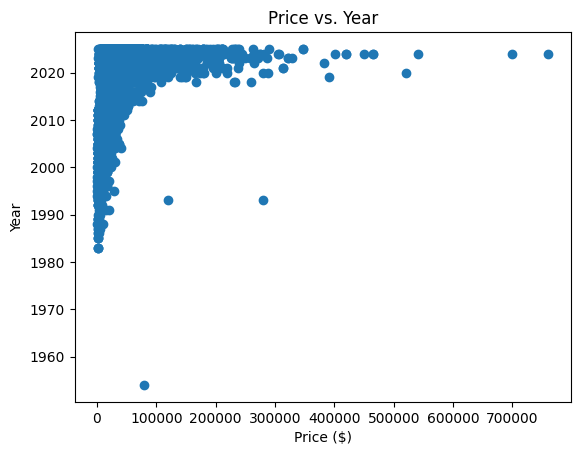

In [18]:
plt.scatter(df_reordered['price($)'], df_reordered['year'])
plt.xlabel('Price ($)')
plt.ylabel('Year')
plt.title('Price vs. Year')
plt.show()

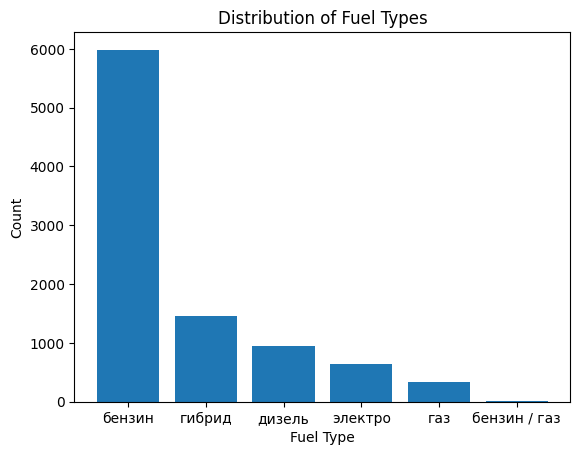

In [19]:
fuel_counts = df_reordered['fuel'].value_counts()
plt.bar(fuel_counts.index, fuel_counts.values)
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Distribution of Fuel Types')
plt.show()

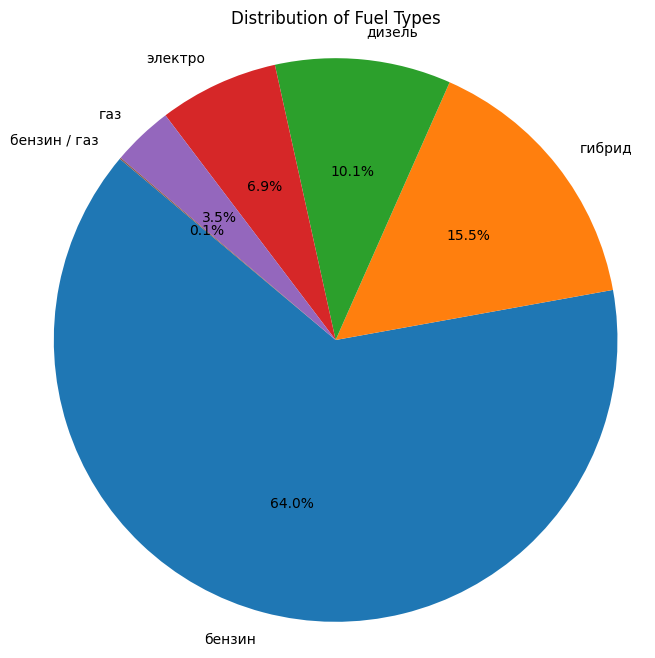

In [20]:
fuel_counts = df_reordered['fuel'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fuel Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

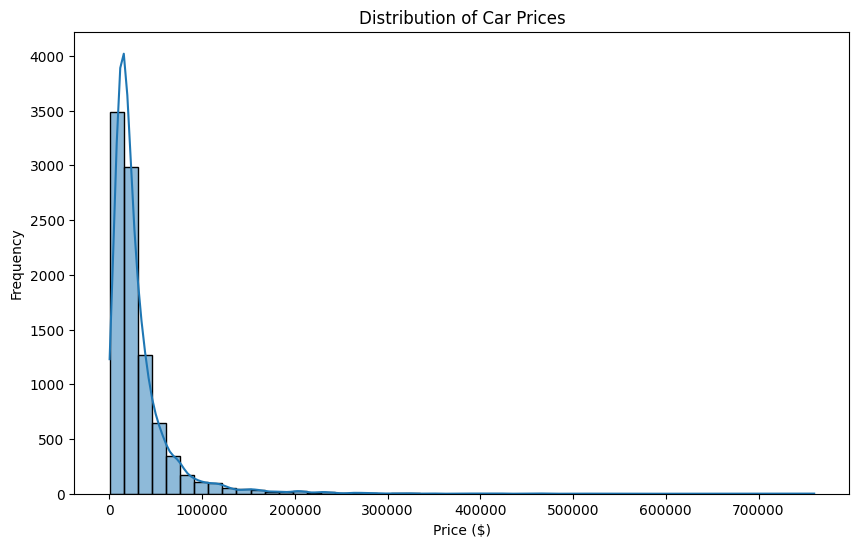

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df_reordered['price($)'], bins=50, kde=True)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()

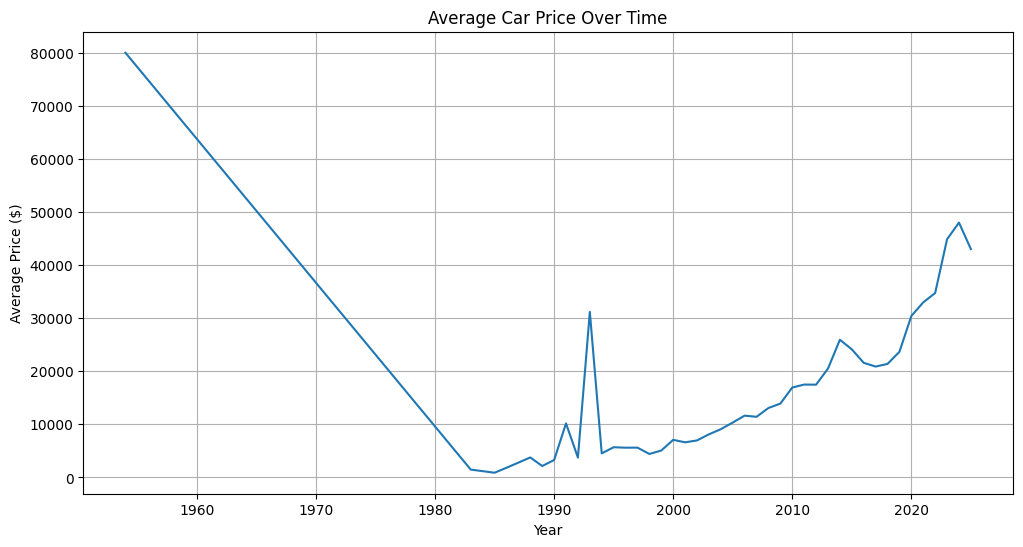

In [27]:
average_price_by_year = df_reordered.groupby('year')['price($)'].mean()

plt.figure(figsize=(12, 6))
plt.plot(average_price_by_year.index, average_price_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.title('Average Car Price Over Time')
plt.grid(True)
plt.show()

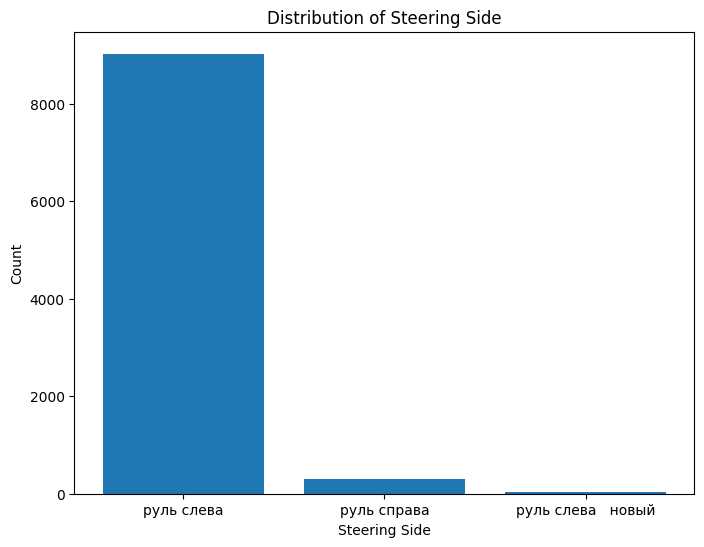

In [32]:
# Bar chart for steering side (steering)
steering_counts = df_reordered['steering'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(steering_counts.index, steering_counts.values)
plt.xlabel('Steering Side')
plt.ylabel('Count')
plt.title('Distribution of Steering Side')
plt.show()